# Telco Customer Churn

About Dataset

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Dataset:

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn Services that each customer has signed up for : 

phone, 

multiple lines, 

Internet,

online security, 

online backup, 

device protection, 

tech support, and 

streaming TV and movies.

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers – gender, age range, and if they have partners and dependents.



TODO:


Preprocessing:
Perform initial data preparation by converting the 'TotalCharges' column to numeric values and filling missing values with 0.


Convert the 'Churn' column to binary values, where 'No' is mapped to 0 and 'Yes' is mapped to 1.<br>


Split the data into an 80-20 train-test split with a random state of “1”.<br>


Select these features:  
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']<br>


Feature engineering:
The numerical features should be scaled using StandardScaler, convert the output back to a dataframe and put back the column names.
The categorical features are one-hot encoded using OneHotEncoder(set sparse_output to false), convert the output back to a dataframe and put back the column names.<br>
Combine scaled numerical and one-hot encoded categorical features into train and test set dataframes (use pd.concat)<br>
Use scikit learn to train a random forest and extra trees classifier, and use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. 

Answer the following questions:


Question 14: What is the accuracy on the test set using the random forest classifier?


Question 15: What is the accuracy on the test set using the xgboost classifier? 


Question 16: What is the accuracy on the test set using the LGBM classifier? 


Question 17: To improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV). 

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?       


Question 18: Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?
    
    
Question 19: What other hyperparameters can be tuned for ExtraTreeClassifer?


Question 20: Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the two most important respectively?

  


# Import Libraries

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
!pip install missingno
import missingno as msno


Defaulting to user installation because normal site-packages is not writeable


In [69]:
# Load the dataset
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [70]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
#Describe dataset
print (f"Telco has {telco.shape[0]} rows and {telco.shape[1]} columns")

Telco has 7043 rows and 21 columns


In [72]:
#statistical info about the numerical variables.
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [73]:
#information about the features.
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

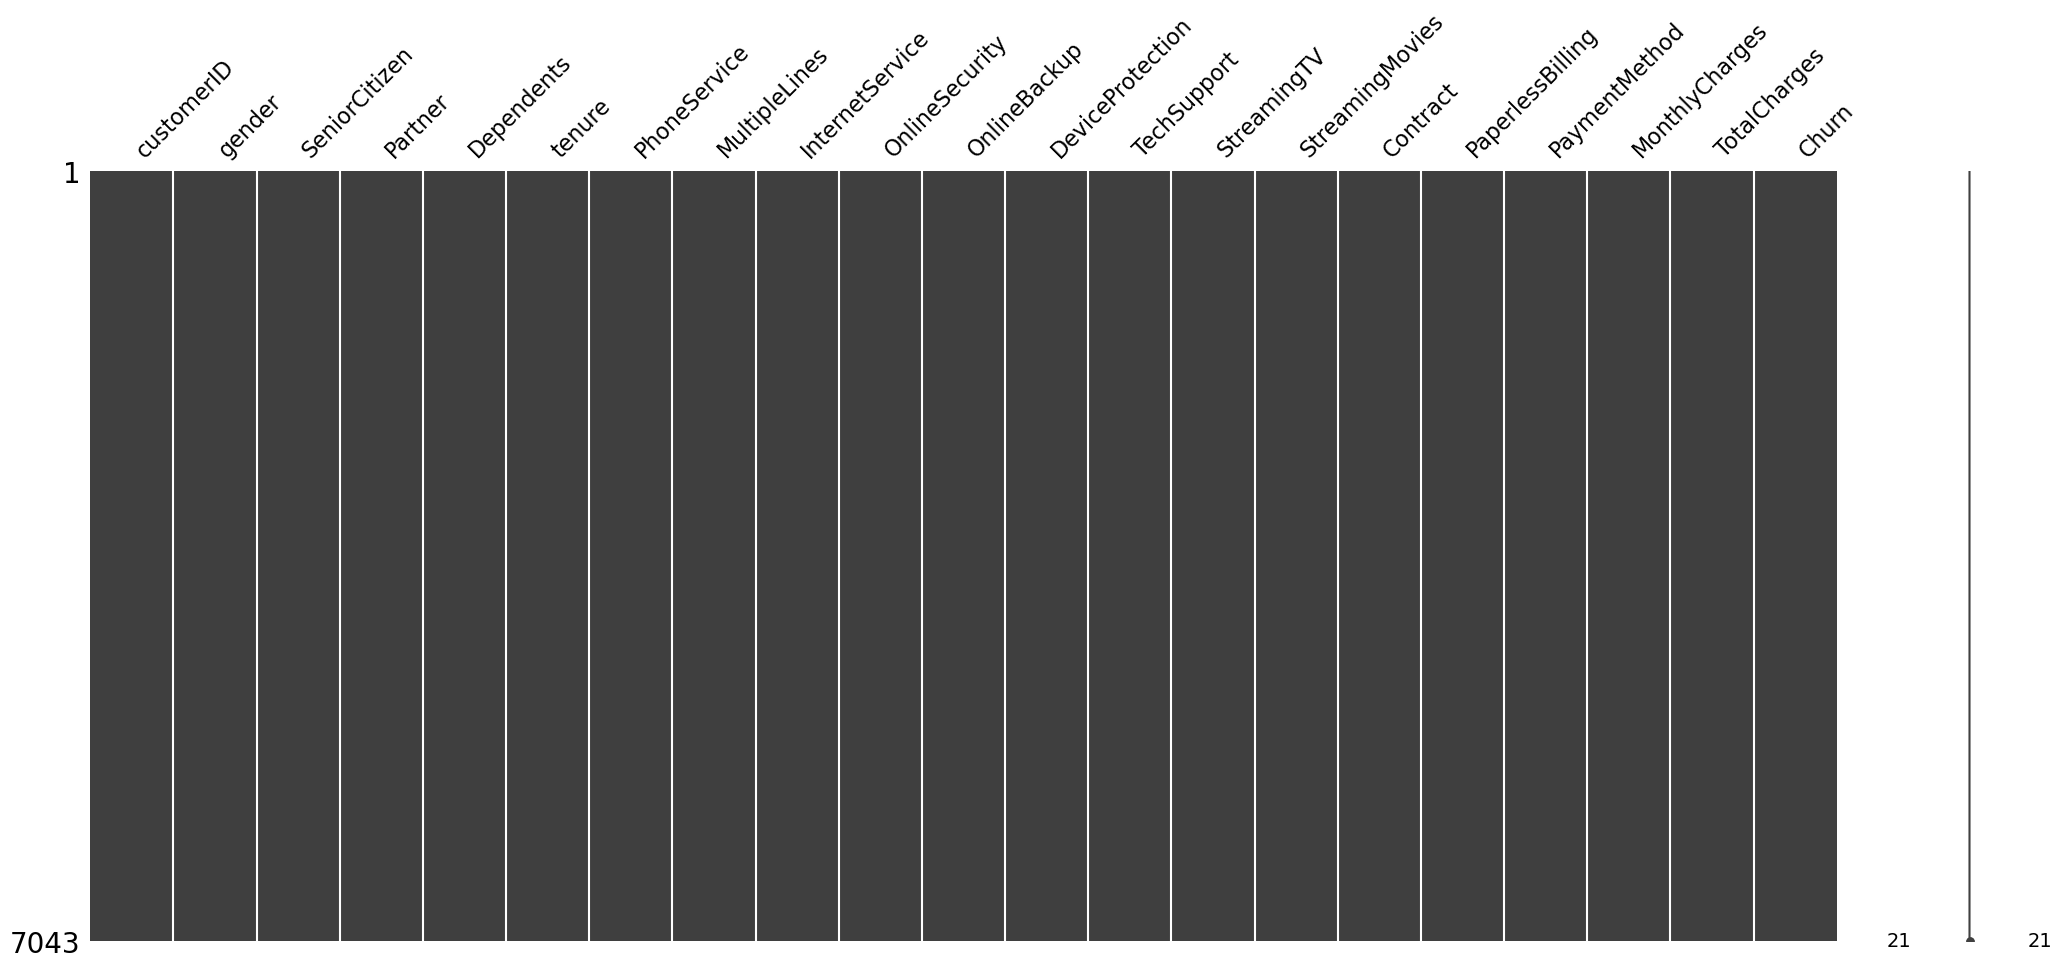

In [74]:
# Checking for missing values in the 'telco' DataFrame
msno.matrix(telco)



In [75]:
#Preprocessing
# Convert 'TotalCharges' to numeric and fill missing values with 0
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce').fillna(0)

# Convert 'Churn' to binary values
telco['Churn'] = telco['Churn'].map({'No': 0, 'Yes': 1})

# Split the data into an 80-20 train-test split with a random state of 1
X = telco.drop('Churn', axis=1)
y = telco['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Select the specified features
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create new DataFrames with selected features
X_train_selected = X_train[categorical + numerical]
X_test_selected = X_test[categorical + numerical]


In [76]:
# Initialize StandardScaler for numerical features
scaler = StandardScaler()

# Fit and transform the scaler on the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train_selected[numerical])
X_test_scaled = scaler.transform(X_test_selected[numerical])

# Create DataFrames from the scaled numerical features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical)

# Initialize OneHotEncoder with sparse_output=False for categorical features
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the encoder on the training data, and transform the test data
X_train_encoded = encoder.fit_transform(X_train_selected[categorical])
X_test_encoded = encoder.transform(X_test_selected[categorical])

# Get the column names for the one-hot encoded features
encoded_columns = encoder.get_feature_names_out(input_features=categorical)

# Create DataFrames from the one-hot encoded categorical features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns)

# Combine scaled numerical and one-hot encoded categorical features
X_train_final = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_encoded_df], axis=1)


## Question 14: What is the accuracy on the test set using the random forest classifier?

In [77]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train_final, y_train)
rf_predictions = rf_model.predict(X_test_final)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Accuracy on the test set using Random Forest Classifier: {rf_accuracy:.4f}")


Accuracy on the test set using Random Forest Classifier: 0.7913


## Question 15: What is the accuracy on the test set using the xgboost classifier?


In [78]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train_final, y_train)
xgb_predictions = xgb_model.predict(X_test_final)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"Accuracy on the test set using XGBoost Classifier: {xgb_accuracy:.4f}")


Accuracy on the test set using XGBoost Classifier: 0.7935


## Question 16: What is the accuracy on the test set using the LGBM classifier?



In [79]:
# LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=1)
lgbm_model.fit(X_train_final, y_train)
lgbm_predictions = lgbm_model.predict(X_test_final)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

print(f"Accuracy on the test set using LGBM Classifier: {lgbm_accuracy:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269968 -> initscore=-0.994785
[LightGBM] [Info] Start training from score -0.994785
Accuracy on the test set using LGBM Classifier: 0.8034


The accuracy on the test set using LGBM Classifier is 0.8034

## Question 17: To improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,

                   'min_samples_leaf': min_samples_leaf,

                   'min_samples_split': min_samples_split,

                   'max_features': max_features}
Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. 

What are the best hyperparameters from the randomized search CV?



In [ ]:
# Define a valid hyperparameter grid
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['sqrt', 'log2', None]  # 'auto' is replaced with valid values

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

# Initialize the Extra Trees Classifier
etc_model = ExtraTreesClassifier(random_state=1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(etc_model, param_distributions=hyperparameter_grid,
                                   n_iter=10, scoring='accuracy', cv=5, n_jobs=-1,
                                   verbose=1, random_state=1)

# Perform the random search for hyperparameters
random_search.fit(X_train_final, y_train)

# Retrieve the best hyperparameters
best_hyperparameters = random_search.best_params_
print("Best hyperparameters:", best_hyperparameters)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


## Question 18: Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?



In [ ]:
# Create a new ExtraTreesClassifier with the best hyperparameters
optimal_etc_model = ExtraTreesClassifier(random_state=1, **best_hyperparameters)

# Train the new model with the best hyperparameters
optimal_etc_model.fit(X_train_final, y_train)

# Make predictions with the new model
optimal_etc_predictions = optimal_etc_model.predict(X_test_final)

# Calculate accuracy for the new model
optimal_etc_accuracy = accuracy_score(y_test, optimal_etc_predictions)

print(f"Accuracy of the new optimal ExtraTreesClassifier: {optimal_etc_accuracy:.4f}")


From the accuracy of the new optimal ExtraTreesClassifier, which is 0.8062,the accuracy of the new optimal ExtraTreesClassifier is higher (0.8062) compared to the initial ExtraTreesClassifier model without hyperparameter tuning.

## Question 19: What other hyperparameters can be tuned for ExtraTreeClassifer?



The hyperparameters are n_estimators, min_samples_split, min_samples_leaf, and max_features, the ExtraTreesClassifier in scikit-learn offers several other hyperparameters that can be tuned to further fine-tune the model's performance. Some of these additional hyperparameters include:

 max_depth: Maximum depth of the tree. Controlling the depth of the tree can help prevent overfitting. You can set an appropriate maximum depth based on your dataset.

 min_impurity_decrease: Minimum decrease in impurity required for a split to happen. It controls when a node is split based on impurity reduction.

 max_leaf_nodes: The maximum number of leaf nodes in the tree. It can be used to limit the size of the tree.

 bootstrap: A boolean flag that indicates whether or not bootstrap samples should be used when building trees.

 class_weight: You can assign weights to classes to handle class imbalance. It's especially useful when you have imbalanced data.

 criterion: The function to measure the quality of a split, which can be 'gini' or 'entropy'.

 warm_start: If set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble.

 oob_score: If set to True, it computes the out-of-bag score, which is an estimate of the classifier's accuracy based on the samples not used in the training set.

 random_state: Seed for random number generation. Setting it ensures reproducibility.

 verbose: Controls the verbosity of the ensemble model.

The choice of which hyperparameters to tune depends on the specific problem, dataset, and desired model behavior. It's often beneficial to perform a systematic search and cross-validation to find the combination of hyperparameters that works best for your particular use case.


The answer is Both B and C because The ExtraTreesClassifier allows you to tune the following hyperparameters:

B. max_leaf_nodes: The maximum number of leaf nodes in the tree.
C. min_weight_fraction_leaf: Minimum weighted fraction of the sum total of weights required to be at a leaf node.



## Question 20: Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the two most important respectively?

In [ ]:
# Get feature importances from the optimal ExtraTreesClassifier model
feature_importances = optimal_etc_model.feature_importances_

# Create a DataFrame to store feature importance along with their names
feature_importance_df = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': feature_importances})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the two most important features
top_features = feature_importance_df.head(2)

print("The two most important features are:")
print(top_features)


The two most important features are Contract-Month-to-Month and tenure 